In [1]:

from __future__ import print_function

import sys

# sys.path.extend(['/home/jogi/git/repository/dcnn_mri_seg'])
sys.path.extend(['/home/jorg/repository/dcnn_acdc'])

import matplotlib
import matplotlib.pyplot as plt

from matplotlib import cm


from datetime import datetime
from pytz import timezone
import itertools
import copy

import SimpleITK as sitk
import scipy.ndimage.interpolation as interpol

import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import init

import numpy as np
import dill
import os
import glob
from collections import OrderedDict


%matplotlib inline
%load_ext autoreload
%autoreload 2

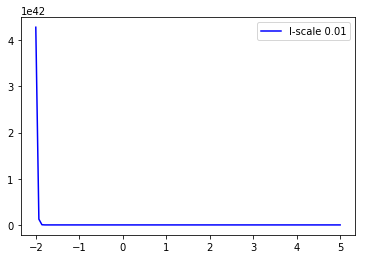

In [7]:
x = np.linspace(-2, 5, 100)
l_scale = 0.01
y = 1./(2 * np.pi) * np.exp(-0.5 * (x) / l_scale)

plt.plot(x, y, 'b', label="l-scale {}".format(l_scale))
plt.legend()
plt.show()

In [1]:
def myshow(img, title=None, margin=0.05):
    
    xsize, ysize = img.shape

    dpi=80
    
    # Make a figure big enough to accommodate an axis of xpixels by ypixels
    # as well as the ticklabels, etc...
    figsize = (1+margin)*ysize / dpi, (1+margin)*xsize / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    # Make the axis the right size...
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    
    t = ax.imshow(img)
    if len(img.shape) == 2:
        t.set_cmap("gray")
    if(title):
        plt.title(title)
    plt.show()